<a href="https://colab.research.google.com/github/borissinchec/MyRepo/blob/main/Codigo_APredict_Sesion03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [63]:
df = pd.read_csv('/content/data_default_credit.csv', delimiter=";")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,2400.0,2,2,1,24,2,2,-1,-1,-2,-2,469.56,372.24,82.68,0.00,0.00,0.00,0.00,82.68,0.00,0.00,0.00,0.00,1
1,8a8c8f3b-8eb4,14400.0,2,2,2,26,-1,2,0,0,0,2,321.84,207.00,321.84,392.64,414.60,391.32,0.00,120.00,120.00,120.00,0.00,240.00,1
2,85698822-43f5,10800.0,2,2,2,34,0,0,0,0,0,0,3508.68,1683.24,1627.08,1719.72,1793.76,1865.88,182.16,180.00,120.00,120.00,120.00,600.00,0
3,0737c11b-be42,6000.0,2,2,1,37,0,0,0,0,0,0,5638.80,5787.96,5914.92,3397.68,3475.08,3545.64,240.00,242.28,144.00,132.00,128.28,120.00,0
4,3b7f77cc-dbc0,6000.0,1,2,1,57,-1,0,-1,0,0,0,1034.04,680.40,4300.20,2512.80,2297.52,2295.72,240.00,4401.72,1200.00,1080.00,82.68,81.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,ecff42d0-bdc6,26400.0,1,3,1,39,0,0,0,0,0,0,22673.76,23137.80,25003.80,10560.48,3748.44,1917.60,1020.00,2400.00,600.36,365.64,600.00,120.00,0
26975,99d1fa0e-222b,18000.0,1,3,2,43,-1,-1,-1,-1,0,0,201.96,219.36,420.24,1077.48,622.80,0.00,220.44,423.12,1079.76,15.48,0.00,0.00,0
26976,95cdd3e7-4f24,3600.0,1,2,2,37,4,3,2,-1,0,0,427.80,402.72,330.96,2505.36,2469.84,2322.84,0.00,0.00,2640.00,504.00,240.00,372.00,1
26977,00d03f02-04cd,9600.0,1,3,1,41,1,-1,0,0,0,-1,-197.40,9405.48,9156.48,6332.88,1422.60,5873.28,10308.00,409.08,141.36,231.12,6355.68,216.48,1


In [4]:
df.shape

(26979, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26979 entries, 0 to 26978
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          26979 non-null  object 
 1   LIMIT_BAL                   26979 non-null  float64
 2   SEX                         26979 non-null  int64  
 3   EDUCATION                   26979 non-null  int64  
 4   MARRIAGE                    26979 non-null  int64  
 5   AGE                         26979 non-null  int64  
 6   PAY_1                       26979 non-null  int64  
 7   PAY_2                       26979 non-null  int64  
 8   PAY_3                       26979 non-null  int64  
 9   PAY_4                       26979 non-null  int64  
 10  PAY_5                       26979 non-null  int64  
 11  PAY_6                       26979 non-null  int64  
 12  BILL_AMT1                   26979 non-null  float64
 13  BILL_AMT2                   269

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,2400.0,2,2,1,24,2,2,-1,-1,-2,-2,469.56,372.24,82.68,0.00,0.00,0.00,0.00,82.68,0.0,0.0,0.00,0.00,1
1,8a8c8f3b-8eb4,14400.0,2,2,2,26,-1,2,0,0,0,2,321.84,207.00,321.84,392.64,414.60,391.32,0.00,120.00,120.0,120.0,0.00,240.00,1
2,85698822-43f5,10800.0,2,2,2,34,0,0,0,0,0,0,3508.68,1683.24,1627.08,1719.72,1793.76,1865.88,182.16,180.00,120.0,120.0,120.00,600.00,0
3,0737c11b-be42,6000.0,2,2,1,37,0,0,0,0,0,0,5638.80,5787.96,5914.92,3397.68,3475.08,3545.64,240.00,242.28,144.0,132.0,128.28,120.00,0
4,3b7f77cc-dbc0,6000.0,1,2,1,57,-1,0,-1,0,0,0,1034.04,680.40,4300.20,2512.80,2297.52,2295.72,240.00,4401.72,1200.0,1080.0,82.68,81.48,0


In [ ]:
## Limpiar la data

In [8]:
print(len(df['ID'].unique()))

26704


In [9]:
df['ID'].value_counts()

d5aeb496-64e5    2
443324fb-5cfc    2
f20d8a3d-d047    2
693a0664-bde6    2
8567249b-827e    2
                ..
0671c9ee-650e    1
08c5ae4a-730a    1
1ef33467-7463    1
81301c65-31d4    1
15d69f9f-5ad3    1
Name: ID, Length: 26704, dtype: int64

In [10]:
df[df['ID']=='d5aeb496-64e5']

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
491,d5aeb496-64e5,18000.0,2,1,2,28,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,38.16,0.0,0.0,0.0,0.0,38.16,0.0,0
584,d5aeb496-64e5,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0


In [13]:
df['suma'] = df.drop('ID',axis=1).sum(axis=1)

In [14]:
df = df[df['suma']!=0]

In [15]:
print(df.shape)
print(len(df['ID'].unique()))

(26664, 26)
26664


In [16]:
## EDUCATION
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [64]:
df['EDUCATION'][df['EDUCATION']==5] = 4
df['EDUCATION'][df['EDUCATION']==6] = 4
df['EDUCATION'][df['EDUCATION']==0] = 4

<ipython-input-64-30484d5c094f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'][df['EDUCATION']==5] = 4
<ipython-input-64-30484d5c094f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'][df['EDUCATION']==6] = 4
<ipython-input-64-30484d5c094f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'][df['EDUCATION']==0] = 4


In [18]:
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [19]:
## MARRIAGE
df['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [65]:
df['MARRIAGE'][df['MARRIAGE']==0] = 4

<ipython-input-65-f904024e8a12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MARRIAGE'][df['MARRIAGE']==0] = 4


In [21]:
## SEX
df['SEX'].value_counts()

2    16080
1    10584
Name: SEX, dtype: int64

In [23]:
df['AGE'].count()

26664

In [24]:
df['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [25]:
df['PAY_2'].value_counts()

 0    13961
-1     5368
 2     3509
-2     3375
 3      289
 4       85
 5       24
 1       24
 7       17
 6       11
 8        1
Name: PAY_2, dtype: int64

In [26]:
df['PAY_3'].value_counts()

 0    13968
-1     5290
-2     3654
 2     3400
 3      214
 4       69
 7       24
 5       20
 6       19
 1        3
 8        3
Name: PAY_3, dtype: int64

<Figure size 2000x2000 with 0 Axes>

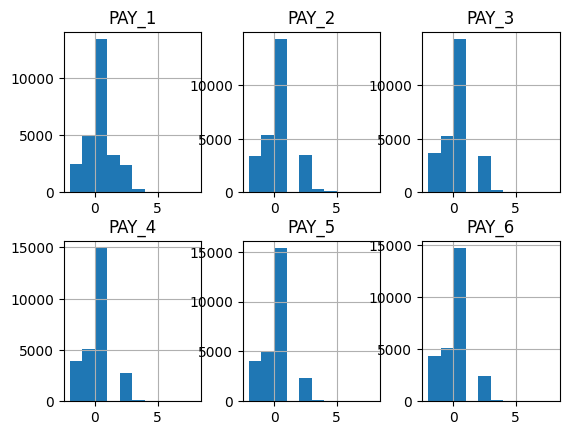

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))

df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]].hist(layout = (2,3));

In [ ]:
Educación (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [67]:
df['n_educ']=0
df['n_educ'][df['EDUCATION']==1] = 1
df['n_educ'][df['EDUCATION']==2] = 3
df['n_educ'][df['EDUCATION']==3] = 2
df['n_educ'][df['EDUCATION']==4] = 0

<ipython-input-67-95d895e91b31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_educ'][df['EDUCATION']==1] = 1
<ipython-input-67-95d895e91b31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_educ'][df['EDUCATION']==2] = 3
<ipython-input-67-95d895e91b31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_educ'][df['EDUCATION']==3] = 2
<ipython-input-67-95d895e91b31>:5: SettingWithCopyWarning: 
A value is trying to be s

In [33]:
df['n_educ'].value_counts()

3    12458
1     9412
2     4380
0      414
Name: n_educ, dtype: int64

In [34]:
import seaborn as sns

<Axes: xlabel='n_educ', ylabel='LIMIT_BAL'>

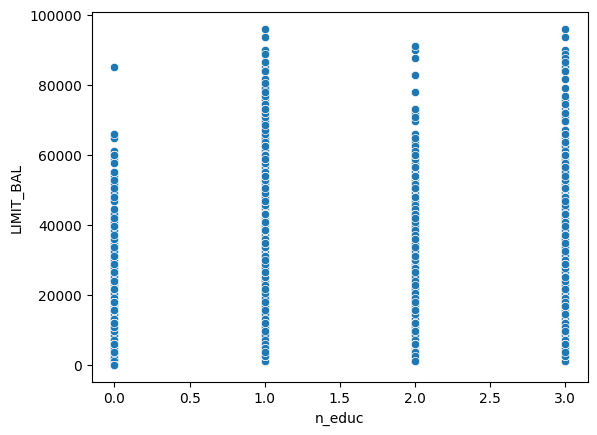

In [68]:
sns.scatterplot(x = 'n_educ', y = 'LIMIT_BAL', data = df)

In [37]:
df.groupby('EDUCATION').agg({'LIMIT_BAL':'median'})

,LIMIT_BAL
EDUCATION,
1,24000.0
2,13200.0
3,9600.0
4,20400.0


<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

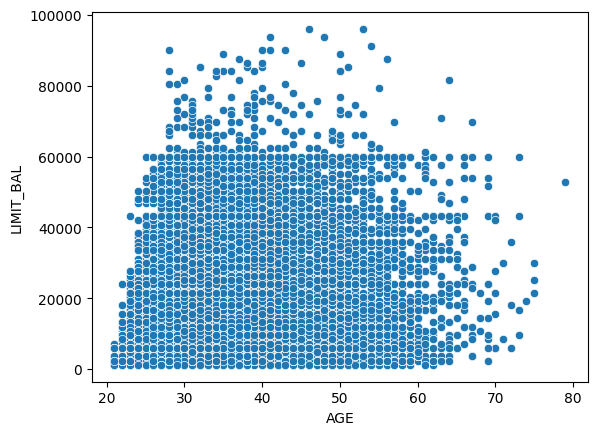

In [38]:
sns.scatterplot(x = 'AGE', y = 'LIMIT_BAL', data = df)

In [39]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'suma', 'n_educ'],
      dtype='object')

In [41]:
## MODELO PREDICTIVO
## PASO1: VARIABLES

features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = ['default payment next month']
X = df[features]
y = df[target]

In [42]:
## PASO2: SEPARAR ENTRE TRAIN Y TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [46]:
## PASO3: ENTRANAMOS EL MODELO
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

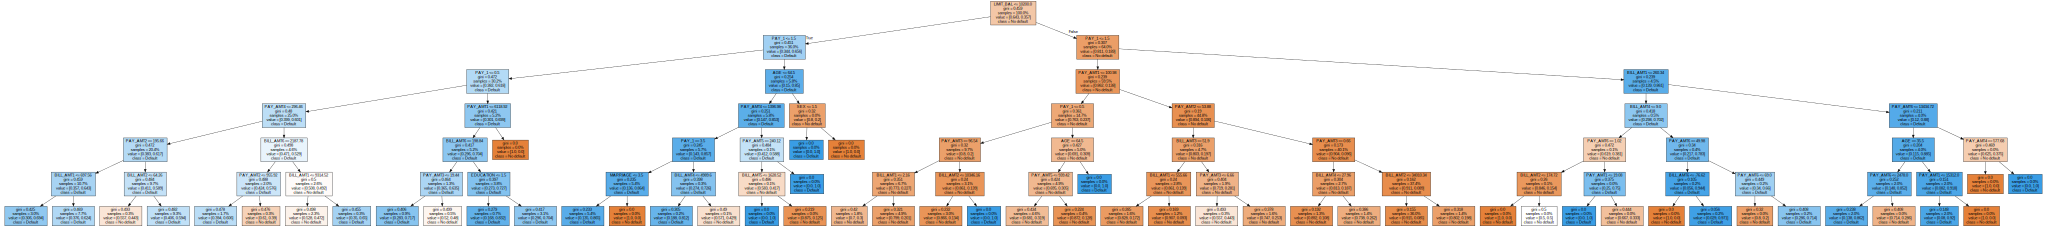

In [58]:
import graphviz

dot_data = tree.export_graphviz(dt,
                                out_file= None,
                                filled = True,
                                feature_names = features,
                                proportion = True,
                                class_names = ['No default', 'Default'])
graph = graphviz.Source(dot_data)
graph

In [49]:
## probar distintos parametros de max_depth

from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1,2,3,4,6,8,10,12]}
dt = tree.DecisionTreeClassifier()
cv = GridSearchCV(dt,param_grid=params,scoring='roc_auc',return_train_score=True)
cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc')

In [50]:
df_resultados_tree = pd.DataFrame(cv.cv_results_)

In [51]:
df_resultados_tree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061439,0.019093,0.028629,0.012023,1,{'max_depth': 1},0.729106,0.729469,0.732573,0.737928,0.740554,0.733926,0.004580,8,0.735132,0.735041,0.734264,0.732926,0.732269,0.733926,0.001145
1,0.103362,0.058296,0.012941,0.002404,2,{'max_depth': 2},0.789864,0.799006,0.804532,0.796631,0.808085,0.799623,0.006329,5,0.802091,0.799826,0.798418,0.800418,0.797547,0.799660,0.001582
2,0.084769,0.002936,0.009744,0.000238,3,{'max_depth': 3},0.815674,0.815806,0.825373,0.815250,0.828172,0.820055,0.005559,3,0.822904,0.822648,0.819782,0.822953,0.819491,0.821556,0.001573
3,0.132724,0.016161,0.013130,0.002013,4,{'max_depth': 4},0.821429,0.823606,0.827674,0.823055,0.833338,0.825820,0.004285,2,0.831519,0.830962,0.828710,0.831108,0.827708,0.830001,0.001508
4,0.212000,0.005421,0.014619,0.001394,6,{'max_depth': 6},0.819339,0.821851,0.828677,0.825490,0.835468,0.826165,0.005630,1,0.844320,0.843391,0.840459,0.843558,0.839636,0.842273,0.001862
5,0.240323,0.034081,0.012908,0.002812,8,{'max_depth': 8},0.815888,0.805177,0.827157,0.808425,0.830099,0.817349,0.009886,4,0.862865,0.861136,0.858754,0.860832,0.857755,0.860269,0.001812
6,0.233991,0.003891,0.009700,0.000527,10,{'max_depth': 10},0.790444,0.789985,0.810652,0.790215,0.803136,0.796886,0.008511,6,0.886365,0.885516,0.881368,0.884851,0.882297,0.884079,0.001919
7,0.270495,0.002877,0.009669,0.001327,12,{'max_depth': 12},0.754957,0.763225,0.779782,0.761883,0.772942,0.766558,0.008754,7,0.916519,0.914501,0.910525,0.916701,0.911747,0.913999,0.002492


<Axes: >

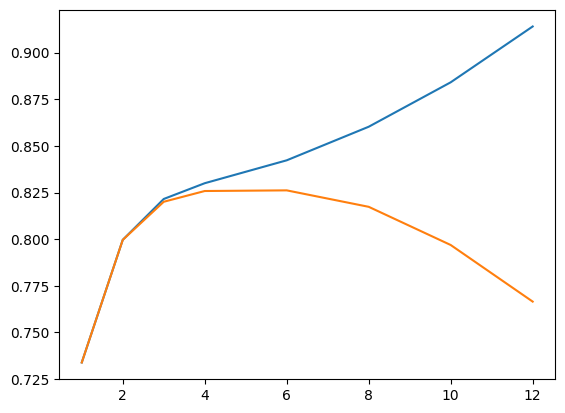

In [52]:
ax = plt.axes()
ax.plot(df_resultados_tree['param_max_depth'],df_resultados_tree['mean_train_score'], label = 'TRAIN')
ax.plot(df_resultados_tree['param_max_depth'],df_resultados_tree['mean_test_score'], label = 'TEST')
ax

In [69]:
cv.best_params_

{'max_depth': 6}

In [54]:
## PASO3: CREAR MODELO
dt = tree.DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [56]:
## PASO4: EVALUAR EL MODELO
y_pred = dt.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[2838,  631],
       [ 518, 1346]])

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thersholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.7701031020306157

In [70]:
df_nuevos_clientes = pd.read_csv('/content/nuevos_clientes.csv', delimiter=";")

In [71]:
df_nuevos_clientes['prediccion'] = dt.predict(df_nuevos_clientes[features])

In [72]:
df_nuevos_clientes

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediccion
0,798fc410-45c1,2400,2,2,1,24,2,2,-1,-1,-2,-2,469.56,372.24,82.68,0.00,0.00,0.00,0.00,82.68,0.00,0.00,0.00,0.00,1
1,8a8c8f3b-8eb4,14400,2,2,2,26,-1,2,0,0,0,2,321.84,207.00,321.84,392.64,414.60,391.32,0.00,120.00,120.00,120.00,0.00,240.00,0
2,85698822-43f5,10800,2,2,2,34,0,0,0,0,0,0,3508.68,1683.24,1627.08,1719.72,1793.76,1865.88,182.16,180.00,120.00,120.00,120.00,600.00,0
3,0737c11b-be42,6000,2,2,1,37,0,0,0,0,0,0,5638.80,5787.96,5914.92,3397.68,3475.08,3545.64,240.00,242.28,144.00,132.00,128.28,120.00,1
4,3b7f77cc-dbc0,6000,1,2,1,57,-1,0,-1,0,0,0,1034.04,680.40,4300.20,2512.80,2297.52,2295.72,240.00,4401.72,1200.00,1080.00,82.68,81.48,0
5,ceae2946-47e4,6000,1,1,2,37,0,0,0,0,0,0,7728.00,6848.28,6912.96,2327.28,2354.28,2402.88,300.00,217.80,78.84,120.00,120.00,96.00,1
6,d3b8ce26-9c89,60000,1,1,2,29,0,0,0,0,0,0,44155.80,49442.76,53400.84,65118.36,57960.36,56873.28,6600.00,4800.00,4560.00,2428.68,1650.00,1652.40,0
7,d6e1911b-54d0,12000,2,2,2,23,0,-1,-1,0,0,-1,1425.12,45.60,72.12,26.52,-19.08,68.04,45.60,72.12,0.00,69.72,202.44,185.04,0
8,8421d3b3-2b54,16800,2,3,1,28,0,0,2,0,0,0,1354.20,1691.52,1452.96,1465.32,1415.16,446.28,399.48,0.00,51.84,120.00,120.00,120.00,0
9,62a2fd79-cd90,2400,1,3,2,35,-2,-2,-2,-2,-1,-1,0.00,0.00,0.00,0.00,1560.84,1669.44,0.00,0.00,0.00,1560.84,134.64,0.00,1


In [ ]:
### Calcular los beneficios del modelo
# campaña proactiva de pago
# beneficio de este modelo: evitar perdidas porque no nos paguen el monto que nos tienen que pagar
# costo de usar el modelo: costo de la campaña (llamada, regalo, asesoria, curso)


In [78]:
##Supuestos
costo_por_campaña = 1300
efectividad = 0.70


In [73]:
dt.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
test_pred_proba = dt.predict_proba(X_test)[:,1]

In [83]:
from collections import Counter
umbral = 0.90
pos_pred = test_pred_proba>umbral
Counter(pos_pred)

Counter({False: 5210, True: 123})

In [77]:
sum(pos_pred)

5322

In [84]:
# costo de la campaña
sum(pos_pred) * costo_por_campaña

159900

In [80]:
# beneficio

In [81]:
tru_pos = pos_pred & y_test['default payment next month'].astype(bool)
Counter(tru_pos)

Counter({False: 3480, True: 1853})

In [ ]:
## cual hubiera sido el beneficio de hacer la campana

In [85]:
sum(X_test['BILL_AMT1']*tru_pos*efectividad)

6516481.103999995